### Importando a biblioteca e o dataset



Importe a biblioteca pandas com o nome "pd".

In [4]:
import pandas as pd


Importe o dataset da pink tax , será nossa base de dados para trabalho.

In [5]:
data = pd.read_csv('pink_tax.csv', header = 0, index_col = 0) 

### Primeiro contato com os dados

Utilize a função head() para visualizar os primeiros itens do seu dataset. O que acontece se você colocar algum número dentro do parenteses? 

In [6]:
data.head()

,Store,Category,Item Type,Name (on Website),Gender,Price
0,Carter's,Kids,Baby Jeans,5-Pocket Embellished Skinny Jeans,F,28.0
1,Carter's,Kids,Baby Jeans,5-Pocket Skinny Jeans,M,14.4
2,Carter's,Kids,Baby Jeans,Printed French Terry Pants,F,8.0
3,Carter's,Kids,Baby Jeans,French Terry Pants,M,8.0
4,Carter's,Kids,Baby Shirts,Printed Tee,F,5.0



Utilize a função info(), quais informações consegue obter com ela? Como é seu dataset?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 734
Data columns (total 6 columns):
Store                682 non-null object
Category             682 non-null object
Item Type            682 non-null object
Name (on Website)    682 non-null object
Gender               682 non-null object
Price                682 non-null float64
dtypes: float64(1), object(5)
memory usage: 37.3+ KB


### Análise das colunas do dataframe

Quantos valores diferentes existem em cada coluna?

In [8]:
data.nunique()

Store                 25
Category               3
Item Type             29
Name (on Website)    647
Gender                 2
Price                218
dtype: int64

Quantos tipos de item diferentes aparecem no dataset? (dica: use a coluna 'Item Type')

In [9]:
data['Item Type'].nunique()

29

Quais são esses diferentes itens que estão listados no dataset?

In [10]:
data['Item Type'].unique()

array(['Baby Jeans', 'Baby Shirts', 'Baby Shoes', 'Baby Sweaters',
       "Children's Jeans", "Children's Shirts", "Children's\r\nUnderwear",
       'Onesie', 'Toddler Shoes', 'Preschool Toys', 'Arts and Crafts',
       'Backpacks', 'Bikes & Scooters', 'General Toys', 'Helmets & Pads',
       'Dress Pants', 'Dress Shirt', 'Jeans', 'Shirt', 'Socks', 'Sweater',
       'Underwear', 'Body Wash', 'Deodorant', 'Hair Care', 'Lotion',
       'Razor', 'Razor\r\nCartridges', 'Shaving\r\nCream'], dtype=object)

Quantas vezes cada item diferente um aparece?

In [11]:
data['Item Type'].value_counts()

Jeans                      50
Sweater                    42
Dress Shirt                40
Underwear                  40
Shirt                      40
Dress Pants                40
Socks                      39
Bikes & Scooters           22
Onesie                     20
Razor                      20
Deodorant                  20
Backpacks                  20
Shaving\r\nCream           20
Baby Sweaters              20
Baby Shirts                20
Baby Jeans                 20
Children's\r\nUnderwear    20
Helmets & Pads             20
General Toys               19
Children's Shirts          19
Baby Shoes                 19
Children's Jeans           19
Body Wash                  18
Razor\r\nCartridges        18
Hair Care                  16
Preschool Toys             13
Arts and Crafts            10
Lotion                     10
Toddler Shoes               8
Name: Item Type, dtype: int64

Quantas categorias diferentes há no dataset? (dica: use a coluna 'Category')

In [12]:
data['Category'].nunique()

3

Quais são as diferentes categorias?

In [13]:
data['Category'].unique()


array(['Kids', 'Clothes', 'Beauty'], dtype=object)

### Seleção

Crie uma variável com a coluna "Price" do dataframe.

In [14]:
price = data['Price'] #seleciona como series 

Selecione a 16a linha do seu dataframe. Qual é o item mostrado? Qual é o seu preço? (lembre que a contagem começa em 0)

In [15]:
data.iloc[15]

Store                                Carter's
Category                                 Kids
Item Type                       Baby Sweaters
Name (on Website)    Half-Zip Fleece Pullover
Gender                                      M
Price                                    13.2
Name: 15, dtype: object

Crie duas variáveis. Uma com as entradas de itens femininos e outra com os masculinos

In [16]:
male = data[data['Gender'] == 'M'] 
female = data[data['Gender'] == 'F']

Crie novos dataframe agora com as colunas:

*   Price
*   Item Type
*   Category

para produtos femininos e masculinos (dica: use as variáveis já criadas acima)





In [17]:
pcg_male = male[['Price', 'Category', 'Item Type'] ]
pcg_female = female[['Price', 'Category', 'Item Type'] ]

Calcule a média dos preços dos produtos separados por gênero e compare os dois. (dica: crie duas variáveis com esses valores "media_masculino e media_feminino")

In [18]:
male_avg = pcg_male['Price'].mean()
female_avg = pcg_female['Price'].mean()

print("Media de preço de produtos masculinos", male_avg)
print("Media de preço de produtos femininos:", female_avg)

Media de preço de produtos masculinos 29.2886842105263
Media de preço de produtos femininos: 31.471764705882315


### Extra: alguns gráficos com matplotlib

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Faça um gráfico de barras com a frequência de cada tipo de item. (quantas vezes ele aparece)

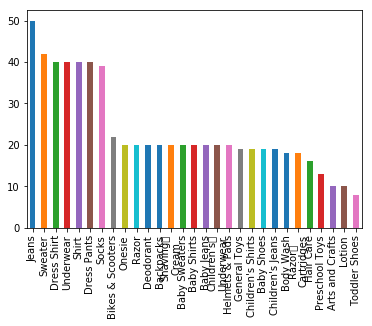

In [20]:
data['Item Type'].value_counts().plot(kind = 'bar')

In [21]:
red = mpatches.Patch(color='red', label='Feminino')
blue = mpatches.Patch(color = 'blue', label = 'Masculino')


In [22]:
male_average = []
female_average = []
for item in data['Item Type'].unique():
    male_average.append(data[(data['Gender'] == 'M') & (data['Item Type'] == item)].mean()[0])
    female_average.append(data[(data['Gender'] == 'F') & (data['Item Type'] == item)].mean()[0])

In [23]:
male_average_cat = []
female_average_cat = []
for item in data['Category'].unique():
    male_average_cat.append(data[(data['Gender'] == 'M') & (data['Category'] == item)].mean()[0])
    female_average_cat.append(data[(data['Gender'] == 'F') & (data['Category'] == item)].mean()[0])

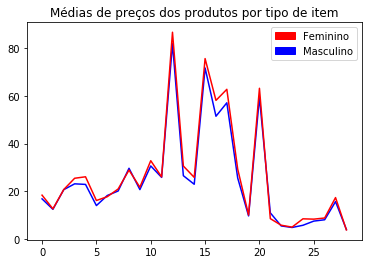

In [24]:
plt.plot(male_average, color = 'b')
plt.plot(female_average, color = 'r')
plt.title('Médias de preços dos produtos por tipo de item')
plt.legend(handles=[red,blue])
plt.show()

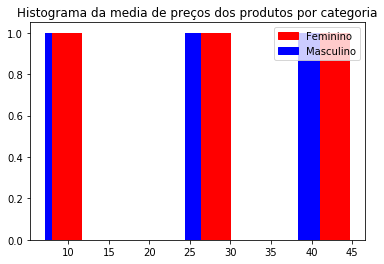

In [25]:
plt.hist(male_average_cat, color = 'b')
plt.hist(female_average_cat, color = 'r')
plt.title('Histograma da media de preços dos produtos por categoria')
plt.legend(handles=[red,blue])
plt.show()

### Group by

Crie um objeto de groupby para comparar os produtos por categoria e gênero. Use o .describe() para analisar esses dados. 

In [27]:
data.groupby(['Category', 'Gender']).describe()

Price                                                    \
                 count       mean        std   min    25%    50%     75%   
Category Gender                                                            
Beauty   F        61.0   8.016066   5.593107  1.99   3.99   5.99   9.490   
         M        61.0   7.178689   4.980065  1.29   3.99   5.29   9.400   
Clothes  F       146.0  44.687877  38.548105  3.98  12.96  34.00  69.125   
         M       145.0  41.722069  32.729866  4.00  12.90  32.94  59.950   
Kids     F       133.0  27.721729  30.000206  4.99  14.99  21.95  29.950   
         M       136.0  25.949485  28.859021  4.99  14.30  19.99  28.480   

                         
                    max  
Category Gender          
Beauty   F        26.99  
         M        27.73  
Clothes  F       189.50  
         M       168.00  
Kids     F       299.99  
         M       289.99

Agora analise as médias média de preço por categoria e gênero. (dica: use o mesmo objeto criado acima)

In [28]:
data.groupby(['Category', 'Gender']).mean()

Price
Category Gender           
Beauty   F        8.016066
         M        7.178689
Clothes  F       44.687877
         M       41.722069
Kids     F       27.721729
         M       25.949485

Compare agora as médias por tipo de item e gênero.

In [29]:
data.groupby(["Item Type","Gender"]).mean()

Price
Item Type               Gender           
Arts and Crafts         F       32.790000
                        M       30.590000
Baby Jeans              F       18.325000
                        M       16.765000
Baby Shirts             F       12.580000
                        M       12.380000
Baby Shoes              F       20.690000
                        M       20.638889
Baby Sweaters           F       25.416667
                        M       23.077273
Backpacks               F       25.991000
                        M       25.790000
Bikes & Scooters        F       86.716364
                        M       81.899091
Body Wash               F        5.697778
                        M        5.400000
Children's\r\nUnderwear F       17.670000
                        M       18.170000
Children's Jeans        F       26.033333
                        M       22.830000
Children's Shirts       F       16.077778
                        M       13.950000
Deodorant               F        4.908000
                        M        4.750000
Dress Pants             F       75.655000
                        M       71.705000
Dress Shirt             F       58.107500
                        M       51.455000
General Toys            F       30.547778
                        M       26.492000
Hair Care               F        8.385000
                        M        5.676250
Helmets & Pads          F       25.790000
                        M       22.890000
Jeans                   F       62.752400
                        M       57.092400
Lotion                  F        8.250000
                        M        7.430000
Onesie                  F       20.909000
                        M       20.068000
Preschool Toys          F       21.647143
                        M       20.656667
Razor                   F        8.730000
                        M        7.990000
Razor\r\nCartridges     F       17.301111
                        M       15.605556
Shaving\r\nCream        F        3.728000
                        M        3.889000
Shirt                   F       29.234000
                        M       25.511500
Socks                   F        9.980000
                        M        9.607895
Sweater                 F       63.188095
                        M       59.450000
Toddler Shoes           F       28.850000
                        M       29.600000
Underwear               F        8.457000
                        M       10.898000

Junte tudo e analise as médias das categorias por tipo de item e gênero.

In [30]:
data.groupby(["Category", "Item Type","Gender"]).mean()

Price
Category Item Type               Gender           
Beauty   Body Wash               F        5.697778
                                 M        5.400000
         Deodorant               F        4.908000
                                 M        4.750000
         Hair Care               F        8.385000
                                 M        5.676250
         Lotion                  F        8.250000
                                 M        7.430000
         Razor                   F        8.730000
                                 M        7.990000
         Razor\r\nCartridges     F       17.301111
                                 M       15.605556
         Shaving\r\nCream        F        3.728000
                                 M        3.889000
Clothes  Dress Pants             F       75.655000
                                 M       71.705000
         Dress Shirt             F       58.107500
                                 M       51.455000
         Jeans                   F       62.752400
                                 M       57.092400
         Shirt                   F       29.234000
                                 M       25.511500
         Socks                   F        9.980000
                                 M        9.607895
         Sweater                 F       63.188095
                                 M       59.450000
         Underwear               F        8.457000
                                 M       10.898000
Kids     Arts and Crafts         F       32.790000
                                 M       30.590000
         Baby Jeans              F       18.325000
                                 M       16.765000
         Baby Shirts             F       12.580000
                                 M       12.380000
         Baby Shoes              F       20.690000
                                 M       20.638889
         Baby Sweaters           F       25.416667
                                 M       23.077273
         Backpacks               F       25.991000
                                 M       25.790000
         Bikes & Scooters        F       86.716364
                                 M       81.899091
         Children's\r\nUnderwear F       17.670000
                                 M       18.170000
         Children's Jeans        F       26.033333
                                 M       22.830000
         Children's Shirts       F       16.077778
                                 M       13.950000
         General Toys            F       30.547778
                                 M       26.492000
         Helmets & Pads          F       25.790000
                                 M       22.890000
         Onesie                  F       20.909000
                                 M       20.068000
         Preschool Toys          F       21.647143
                                 M       20.656667
         Toddler Shoes           F       28.850000
                                 M       29.600000